<a href="https://colab.research.google.com/github/manishramamoorthy/Machine-Learning/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing a Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing a DataSet**

In [3]:
data = pd.read_csv("/content/car data.csv")

**Data Preprocessing**

In [4]:
# Top 5 Rows of DataSet
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# Last 5 Rows of Dataset
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
# Number of Rows and Columns
data.shape
print("Number of Rows: ",data.shape[0])
print("Number of Columns: ",data.shape[1])

Number of Rows:  301
Number of Columns:  9


In [7]:
# Data Types
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [8]:
# Getting Information of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**Statistical Measure**

In [9]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


**Missing Values**

In [10]:
print("Any Missing Values: ",data.isnull().values.any())

Any Missing Values:  False


In [11]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

**Drop Duplicates Values**

In [12]:
dup_data = data.duplicated().any()

In [13]:
print("Any Duplicates Values: ",dup_data)

Any Duplicates Values:  True


In [14]:
data = data.drop_duplicates()

**Data Encoding**

In [15]:
# checking the distribution of categorical data
data.Fuel_Type.value_counts()

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

In [16]:
data.Seller_Type.value_counts()

Dealer        193
Individual    106
Name: Seller_Type, dtype: int64

In [17]:
data.Transmission.value_counts()

Manual       260
Automatic     39
Name: Transmission, dtype: int64

Categorical data to Numerical Data

In [19]:
# Encoding a Fuel_type Columns
data.replace({"Fuel_Type":{"Petrol":1,"Diesel":2,"CNG":3}},inplace=True)

In [21]:
# Encoding a Seller_type Columns
data.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)

In [23]:
data.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

In [24]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,0,0,0
1,sx4,2013,4.75,9.54,43000,2,0,0,0
2,ciaz,2017,7.25,9.85,6900,1,0,0,0
3,wagon r,2011,2.85,4.15,5200,1,0,0,0
4,swift,2014,4.60,6.87,42450,2,0,0,0


In [25]:
del data["Car_Name"]

**Separating a DataSet**

In [28]:
data.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [29]:
X = data.drop(columns="Selling_Price",axis=0)
y = data["Selling_Price"]

**Train And Test Split**

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=7)

**Modelling**

1) Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [34]:
LR.coef_

array([ 4.23220114e-01,  4.24865393e-01, -3.46059963e-06,  1.31080123e+00,
       -1.19521451e+00,  8.35975370e-01,  5.55806629e-01])

In [35]:
LR.intercept_

-852.0059679076687

**Evaluation Metrics**

In [33]:
y_pred = LR.predict(X_test)
y_pred

array([ 4.40917453,  4.58177225,  4.55001074,  1.46608185,  3.87764351,
        2.11823055,  1.63703621,  8.75775274,  2.1456783 ,  2.07615451,
        5.88253551,  5.9625156 ,  6.85787639,  3.42227227,  4.97839191,
        7.75387145,  4.05192653, -1.50895164,  1.65694384,  2.0568649 ,
        1.79505866,  5.04186196,  2.43942021,  2.42022012,  7.10084871,
        4.35773166,  4.79604446,  4.85786558,  0.45080704,  6.56276693,
        1.83697308,  0.33220518,  0.69943151,  5.9206021 ,  5.03218698,
        1.55158346,  4.0791971 ,  4.50212716,  4.40380845,  2.35495188,
        5.55434151, -3.28221286,  3.22427359,  4.3554788 ,  1.05432014,
        8.25675457, -0.03790738, -1.27991273,  2.98348069,  2.51299839,
        4.6925092 ,  1.63768718,  1.91360922, 13.57334534,  5.2243672 ,
        9.77238507,  5.7213354 , 15.82200266,  6.46755907,  7.3094517 ,
       -1.95337975, 15.35033415,  2.1038393 ,  6.38188881, 15.66761507,
        8.12323771,  9.18321284, -0.4524418 ,  8.19362285,  4.32

In [36]:
data = pd.DataFrame({"Actual":y_test,"Prediction":y_pred})
data

,Actual,Prediction
270,4.10,4.409175
242,4.40,4.581772
280,5.25,4.550011
178,0.35,1.466082
204,2.75,3.877644
...,...,...
25,3.00,2.451348
63,23.50,19.355650
251,5.00,5.256870
91,11.25,9.615476


In [37]:
from sklearn import metrics
print("R2-Score: ",metrics.r2_score(y_test,y_pred))

R2-Score:  0.8694676676858829


Visulaiztion of Actual and Prediction Values

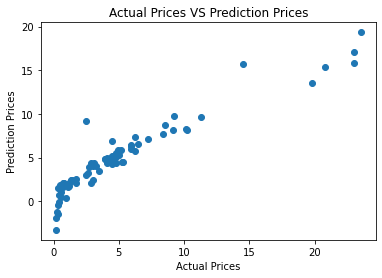

In [38]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Prediction Prices")
plt.title("Actual Prices VS Prediction Prices")
plt.show()

2) Lasso Regression

In [41]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [42]:
lasso.coef_

array([ 3.25373934e-01,  4.75155910e-01, -4.47703985e-06,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [43]:
lasso.intercept_

-654.0123943473717

**Evaluation Metrics**

Prediction

In [44]:
y_pred = lasso.predict(X_test)
y_pred

array([ 4.75570421,  4.52635162,  4.35474275,  1.45272665,  3.59440431,
        2.83082231,  2.29024265,  7.56691148,  2.26320395,  2.63096934,
        4.78855719,  5.92137539,  6.04306649,  4.5362019 ,  4.3449936 ,
        7.92598429,  4.52312959, -0.46548219,  2.45620094,  2.76037248,
        2.44997908,  4.8889944 ,  2.85612606,  3.02170814,  6.91622527,
        3.99334944,  3.43644097,  4.68597002,  1.39225721,  6.30577431,
        2.51463452,  1.41999835,  1.53347367,  4.83780463,  5.16209959,
        2.19831591,  3.68291934,  4.44789836,  4.32368169,  2.94695446,
        4.84337139, -1.6130544 ,  3.59542027,  3.99043488,  1.75554592,
        8.35441968,  1.00971715, -0.42157038,  2.73202842,  3.12534704,
        4.94480588,  2.2806548 ,  2.44675661, 13.21744301,  5.09306968,
        9.4420066 ,  5.52130284, 14.26388409,  6.91788944,  7.57318401,
       -0.57378973, 13.8758316 ,  2.66678566,  5.212426  , 14.78602732,
        8.18168653,  9.32742794,  0.67919004,  8.27274504,  4.24

In [45]:
data = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
data

,Actual,Predicted
270,4.10,4.755704
242,4.40,4.526352
280,5.25,4.354743
178,0.35,1.452727
204,2.75,3.594404
...,...,...
25,3.00,2.596075
63,23.50,18.492269
251,5.00,5.415526
91,11.25,8.675216


In [46]:
from sklearn import metrics
print("R2-Score: ",metrics.r2_score(y_test,y_pred))

R2-Score:  0.8345929522819526


Visulaiztion of Actual and Prediction Values

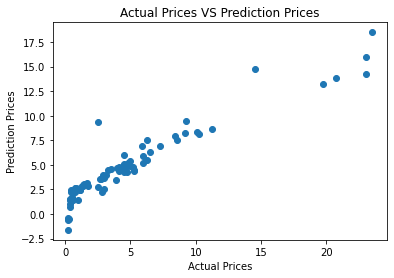

In [47]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Prediction Prices")
plt.title("Actual Prices VS Prediction Prices")
plt.show()